# Searching for Higgs Boson Decay Modes with Deep Learning 

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mls import locate_data
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

#  What is the LHC?

The Large Hadron Collider (LHC) is the worlds largest and most powerful particle accelerator.  Located at the European Orginisation for Nuclear Research, or CERN in France and Switzerland, the LHC has been an instrumental part of modern physics since it was first turned on Sepetember 10th, 2010.  Consisting of thousands of superconducting magnets, and boasting a circumference of 26.7 kilometers (16.6 miles) the LHC lets physicists explore an entirely unique range of interactions at incredible energies by colliding ultrahigh energy particles.  The products of these collisions offer a picture into the fundamental world of particles with more detail and information than ever before [1].

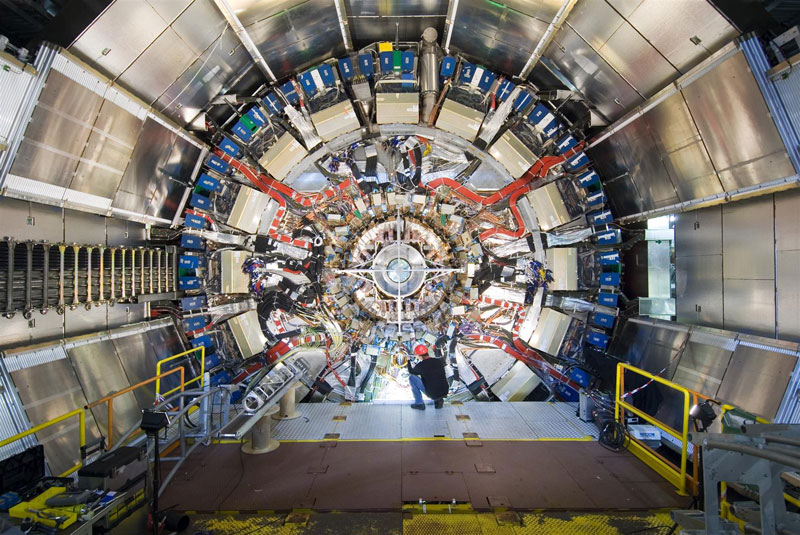 Figure 1. The inside of the ATLAS detector, the heart of the LHC [2]
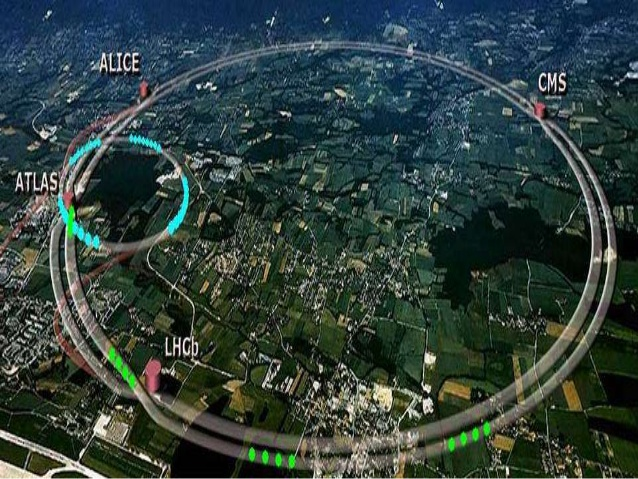 Figure 2.  A Sattelite Image of the LHC and its Detector [3]

# The Higgs Boson

Theorized by Peter Higgs in 1964 to help explain broken electroweak symmetry  , the Higgs boson was only discovered on July 4th, 2012 [2], [3].  Due to the nature of the Higgs particle, with its high mass and short lifetime, and other particle decays which can mimic higgs boson decays it took experimental physicists 50 years and the completion of the LHC to reach an energy threshold where a Higgs boson could be observed [4].

# Why is the Higgs Boson Important?

The Standard Model of particles physics is the theory describing three of the four fundamental forces in our universe.  Although lacking gravity, the standard model provides a wonderful description of the strong, weak, and electromagnetic forces.  However, one mystery which plagued this model was why certain particles such as electrons, and W/Z bosons have mass while other particles like the photon or gluon are massless. The Higgs boson plays its unique role in the standard model by explaining why particles are either massive or massless [5].

# Decay Modes of the Higgs Boson

Oberving the Higgs boson is preidcated upon observation of its decay particles and event reconstruction.  As such, in order to determine if an event inside our detector was indeed a Higgs boson we must first understand its decay modes.  Below is a diagram representing the possible decays and their relative likelihoods for an 125 GeV Standard-Model Higgs boson.

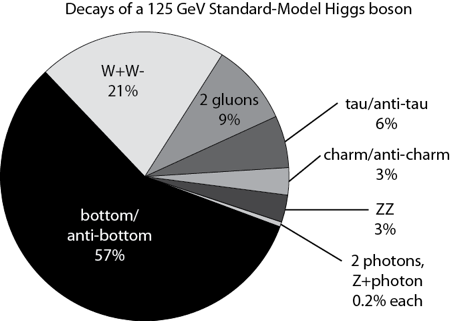Figure 3. Higgs Decay modes [6]

# Particle Detection ATLAS and CMS

A Toridal LHC Apparatus (ATLAS) and the Compact Muon Solenoid (CMS) detectors are two of the main detectors of the LHC.  It is here, in these detectors where particles are detected and events reconstructed.  Both detectors are made of several individual layered components each sensitive to different properties of particles.  By looking at the trajectory of the particle and its interactions with different areas of the device, physicists can determine what particle was in the machine and how that particle was produced.  Below is an example of an event from ATLAS, showing how different types of particles appear in the detector [7].

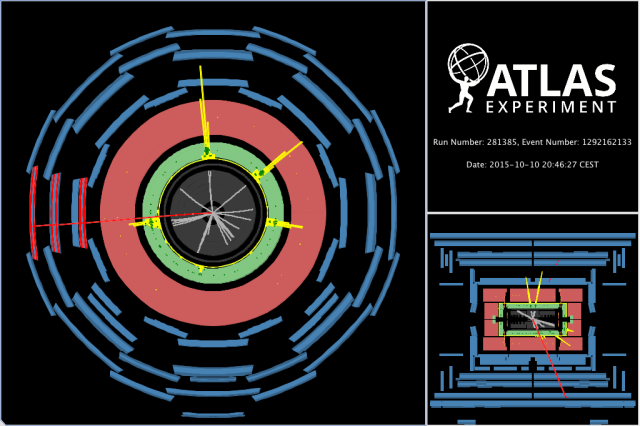 Figure 4.  An example of a detection event inside of the ATLAS collider.  Muon tracks are shown in red, electromagnetic clusters in yellow, inner detector tracks in grey. [8]

The data set below has been produced using Monte Carlo simulations, and contains a number of kinematic properties measured by the particle detectors at the LHC in addition to seven high-level features derived by physicists.  However, determining if the events inside of our detector which produce particles of interest (signal events) from other events(background) is a continued challenge.  Particle discovery relies upon the isolation of a subspace of data in which a proposed particle gives significantly different prediction than a null hypothesis.  The relative probability, or the ratio of the sample likelihood functions of the two competing theroies, is the critical component for particle discovery.  However, an unfortunate problem arises as analytically unsolvable likelihood functions [9].  Machine learning present a unique approach in overcoming this challenge by being able to automatically reduce the dimensionality of our dataset.  With a simple neural network we will try to classify the events in our data set as signal or background.

In [4]:
higgs_data = pd.read_csv('C:\Anaconda3\envs\DAMLA\Lib\site-packages\mls\data\higgs_data.csv')


In [82]:
higgs_data.shape

(10999999, 29)

In our attempt to categorize this data, it might be helpful to have some view of it.  Below is a short statistical description of each feature.  This basic analysis wont tell us much, but it is still helpful as a condensed visual representation of our data.

In [6]:
higgs_data.describe()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299202e-01,9.914659e-01,-8.239884e-06,-1.329277e-05,9.985364e-01,2.619732e-05,9.909153e-01,-2.025261e-05,7.815478e-06,9.999688e-01,...,-5.756004e-06,1.745320e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749748e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125842e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


The first column of this data set is simply telling us if the even we see is a true signal or a background represented respectively by an 1.00 or a 0.00.  With this, we will attempt to make 28 histograms, 1 for each feature, to better understand how a signal will differ from a background event.

In [8]:
event = higgs_data.iloc[:,0]
event_array = np.asarray(event)
noise_index = []
signal_index = []
for i in range(len(event_array)):
    if event_array[i] == 0:
        noise_index.append(i)
    if event_array[i] == 1:
        signal_index.append(i)
        

In [97]:
noise_index = np.asarray(noise_index)
signal_index = np.asarray(signal_index)
feature_name = ['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 'missing energy phi', 'jet 1 pt', 
                'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 
                'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

C:\Anaconda3\envs\DAMLA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\envs\DAMLA\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


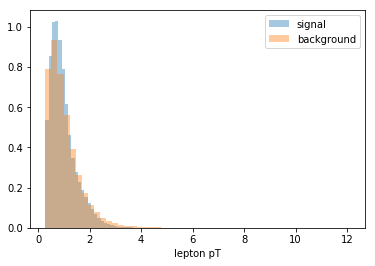

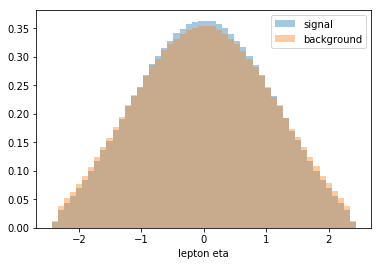

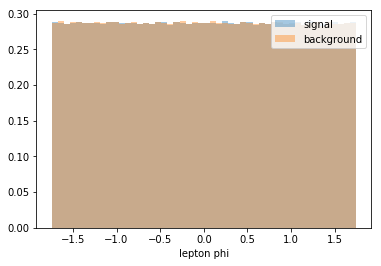

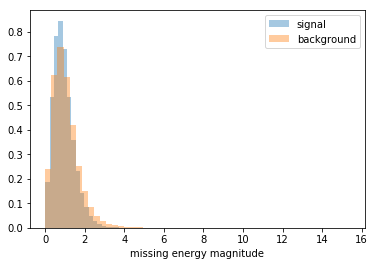

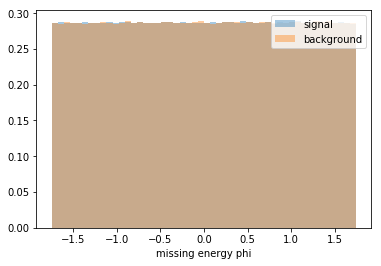

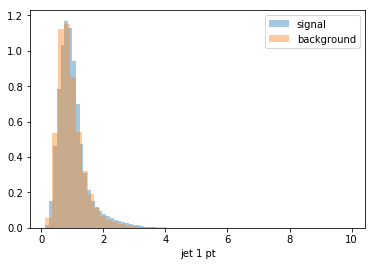

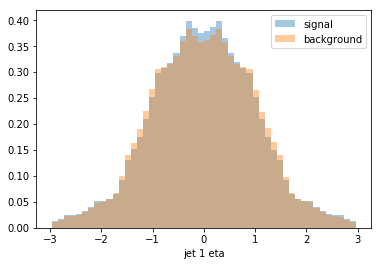

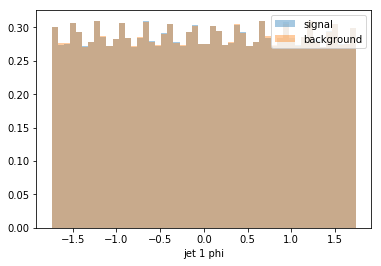

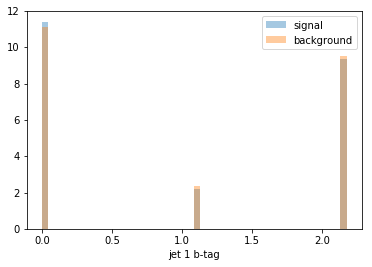

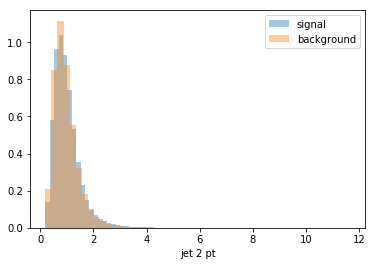

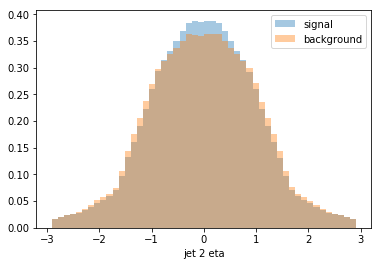

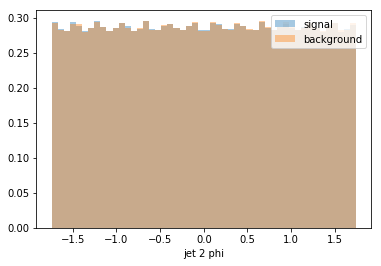

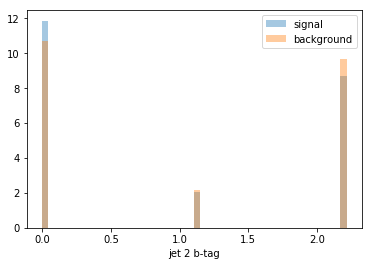

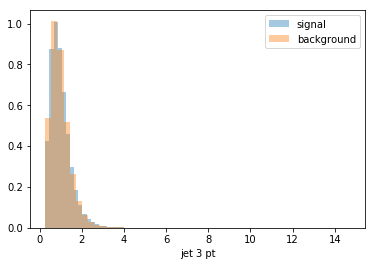

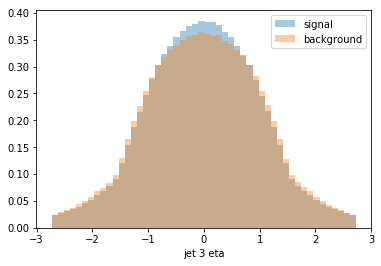

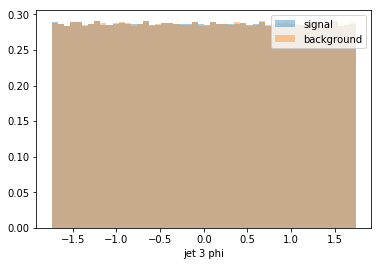

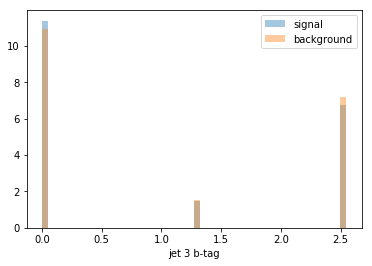

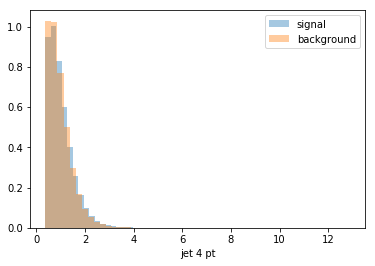

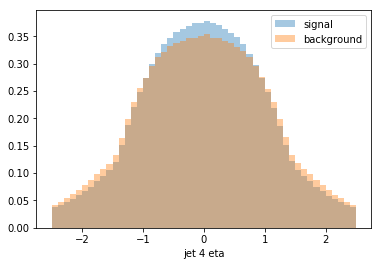

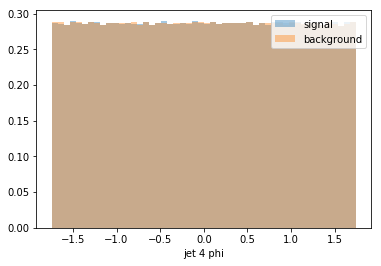

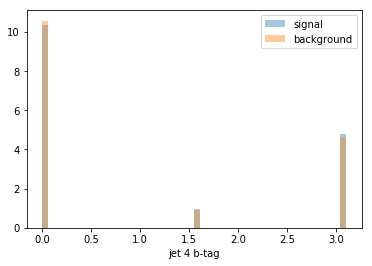

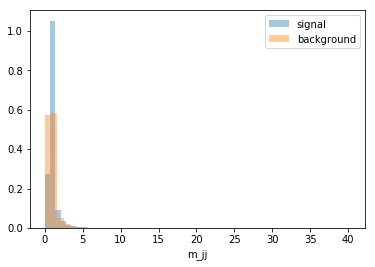

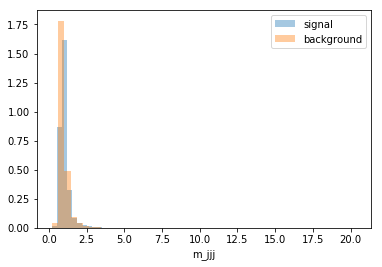

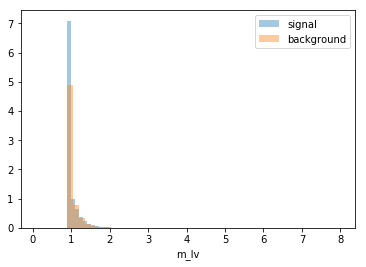

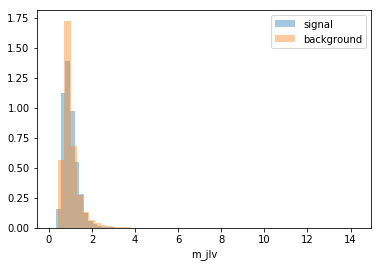

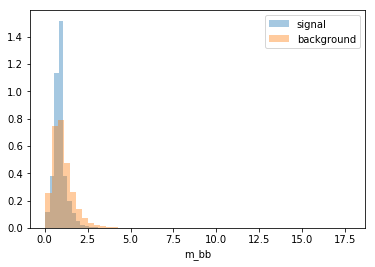

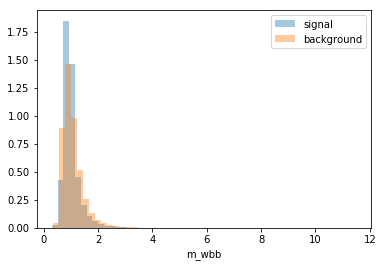

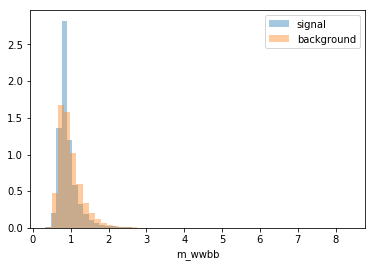

In [98]:
for j in range(1,29):
    feature = higgs_data.iloc[:,j]
    feature = np.asarray(feature)
    feature_noise = []
    feature_signal = []
    for i in range(len(noise_index)):
        feature_noise.append(feature[noise_index[i]])
    for i in range(len(signal_index)):
        feature_signal.append(feature[signal_index[i]])
    legend_signal = 'Feature ' + str(j)
    legend_noise = 'Noise ' + str(j)
    plt.figure(j)
    sns.distplot(feature_signal, label = 'signal', kde = False, norm_hist = True)
    sns.distplot(feature_noise, label = 'background', kde = False, norm_hist = True)
    plt.xlabel(feature_name[j-1])
    plt.legend()
    


Here the blue is a signal histogram and the orange is a background histogram.  As you might be able to tell, the first 21 features are nearly indistinughishable from one another, but the last seven features give easily discernable differences, with different peak heights and different peak locations.  These histograms make it very clear why physicists have gone the extra length to create these seven high level features.

Now we move onto building our neural network.  Our fist step is to seperate our original higgs data set into two different pieces, our training and then testing set.  Our training data will be used to initialize and optimize our nerual network, while the testing data set aside from training.  We will use our testing data set after training to see how well our nerual network was able to determine the differences between the signal and background events

In [14]:
train, test = train_test_split(higgs_data, test_size=0.2)
train  = pd.DataFrame.as_matrix(train)
test = pd.DataFrame.as_matrix(test)

C:\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Anaconda3\envs\DAMLA\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
train_label = train[:,0]
test_label = test[:,0]

In [16]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape=(29,)))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))



model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit( train, train_label, epochs = 1, batch_size= 128)
model.evaluate(test, test_label, batch_size = 128)


Epoch 1/1
2200000/2200000 [==============================] - 39s 18us/step


[1.1017101013521823e-07, 1.0]

Looking at our loss function and accuracy values it is clear our simply neural network did its job.  In fact, we have gotten an hundred percent accuracy for our testing data, a surprise to be sure, but a welcome one.  Our next step is to try an understand how our neural network is making its decision.  By using the prediction function, we can see what probabability each data point had of being a signal, and hopefully from here we can make a distibution plot of the values our neural network used to make its decisions.

In [17]:
predictions = model.predict(test, batch_size = 128, verbose = 1)

2200000/2200000 [==============================] - 31s 14us/step


Here we use a similar method to make out histograms:

In [45]:
test_label = np.asarray(test_label)
test_noise_index = []
test_signal_index = []

for i in range(len(test_label)):
    if test_label[i] ==0:
        test_noise_index.append(i)
    if test_label[i] == 1:
        test_signal_index.append(i)


In [101]:
test_noise_index = np.asarray(test_noise_index)
test_signal_index = np.asarray(test_signal_index)

In [102]:
test_noise = []
test_signal = []
for index in test_noise_index:
    test_noise.append(predictions[index])
for index in test_signal_index:
    test_signal.append(predictions[index])
test_noise = np.asarray(test_noise)
test_signal= np.asarray(test_signal)

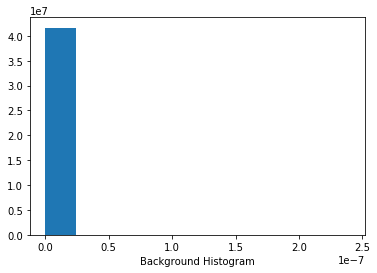

In [133]:
plt.hist(test_noise, density = True)
plt.xlabel('Background Histogram')
plt.show()

C:\Anaconda3\envs\DAMLA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


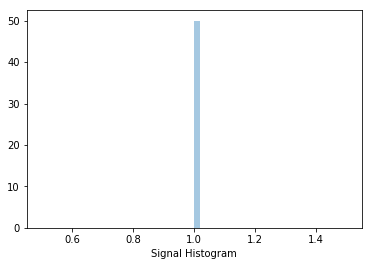

In [135]:
sns.distplot(test_signal, kde = False, norm_hist = True, axlabel = 'Signal Histogram')

Why these odd, shapes and why the very odd percentages?  It turns out that our maximum value for our noise plot was ~2.4E-7 while its minimum was ~8.17E-31 a spread of 24 orders of magnitude!  While both of these probababilities are effectively 0, our histogram has no feasbile way of showing this.  Turning our attention to the signal samples, as we previously noted all of our samples are 1.  A phenonmenal feat, but one which unfortunately cannot be captured in a histogram.  Maybe, a better way of presenting this data is not to give relative frequencies, but instead to show total counts:

C:\Anaconda3\envs\DAMLA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


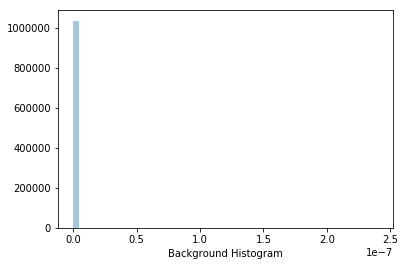

In [131]:
sns.distplot(test_noise, norm_hist = False, kde = False, axlabel = 'Background Histogram')


C:\Anaconda3\envs\DAMLA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


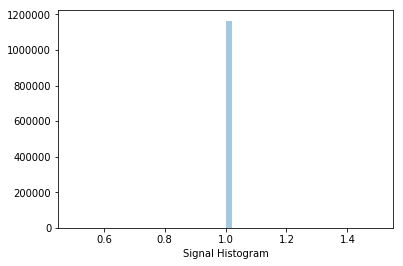

In [137]:
sns.distplot(test_signal, norm_hist = False, kde = False, axlabel = 'Signal Histogram')

# References

1. CERN Accelerating science. (n.d.). Retrieved from https://home.cern/science/accelerators/large-hadron-collider


2. Student Follow. (2013, August 20). Large hadron collider. Retrieved from https://www.slideshare.net/arvindsainair69/large-hadron-collider-25411885

3. The Inner Detector. (2017, July 24). Retrieved from https://atlas.cern/discover/detector/inner-detector

4. Pich, A. (2016). Electroweak Symmetry Breaking and the Higgs Boson. Acta Physica Polonica B, 47(1), 151. doi:10.5506/aphyspolb.47.151

5. CERN Accelerating science. (n.d.). Retrieved December 19, 2018, from https://home.cern/science/physics/higgs-boson

6. Baldi, P., Sadowski, P., & Whiteson, D. (2014). Searching for exotic particles in high-energy physics with deep learning. Nature Communications, 5(1). doi:10.1038/ncomms5308

7. CERN Accelerating science. (n.d.). Retrieved from https://home.cern/science/physics/standard-model

8. Higgs Production and Decay Channels. (n.d.). Retrieved from https://sites.uci.edu/energyobserver/2012/11/26/higgs-production-and-decay-channels/

9. Detector & Technology. (2017, August 02). Retrieved from https://atlas.cern/discover/detector

10. Live Collisions in the ATLAS Detector. (2018, February 09). Retrieved from https://atlas.cern/atlas-live

11. Choudhury, S. (2013). Study of Higgs Boson in Fermionic Decay Channels at CMS. Proceedings of XXI International Workshop on Deep-Inelastic Scattering and Related Subjects — PoS(DIS 2013). doi:10.22323/1.191.0095
